Image Segmentation:

    1.  Semantic Segmentation:
        Same Colour for objects belongs to Same Category.

    2.  Instances Segmentation:
        Different Colour for objects even belongs to Same Category.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

In [0]:
import cv2

In [0]:
img = cv2.imread('rcnn_1.png') 

In [0]:
print(img) 

[[[ 14   8   4]
  [114  69  32]
  [124  76  40]
  ...
  [148  89  39]
  [147  88  38]
  [ 51  51  51]]

 [[ 40  32  26]
  [165 126  94]
  [144 103  71]
  ...
  [143  84  34]
  [142  83  33]
  [ 51  51  51]]

 [[ 50  44  39]
  [229 198 173]
  [195 164 139]
  ...
  [140  81  31]
  [138  79  29]
  [ 51  51  51]]

 ...

 [[ 24  29  34]
  [111 132 159]
  [147 168 195]
  ...
  [123 145 170]
  [140 162 187]
  [ 51  51  51]]

 [[ 25  29  35]
  [123 144 171]
  [ 74  95 122]
  ...
  [115 139 161]
  [113 137 159]
  [ 51  51  51]]

 [[ 20  24  30]
  [ 45  66  93]
  [ 48  69  96]
  ...
  [142 169 190]
  [135 162 183]
  [ 51  51  51]]]


(-0.5, 298.5, 215.5, -0.5)

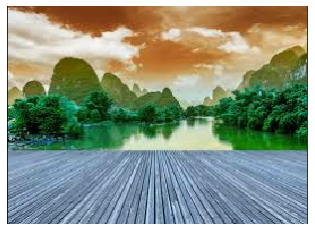

In [0]:
plt.imshow(img)
plt.axis(False)

(-0.5, 298.5, 215.5, -0.5)

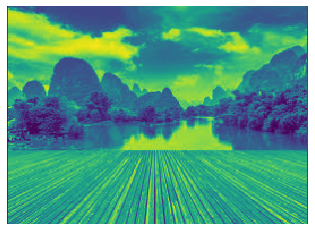

In [0]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
plt.imshow(gray_img) 
plt.axis(False)

'\nfrom skimage.color import rgb2gray\ngray = rgb2gray()\n'

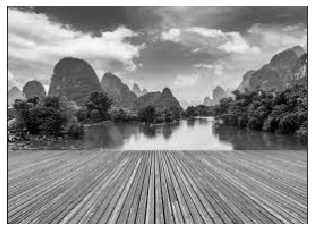

In [0]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
plt.imshow(gray_img, cmap = 'gray')
plt.axis(False) 
#############################
'''
from skimage.color import rgb2gray
gray = rgb2gray()
'''

In [0]:
gray_img.shape

(216, 299)

Given Image Height and Width is 216 and 299 respectively

In [0]:
img_height, img_width = gray_img.shape

Let's Set threshold as mean of the pixel values.

pixel value > threshold is our object.

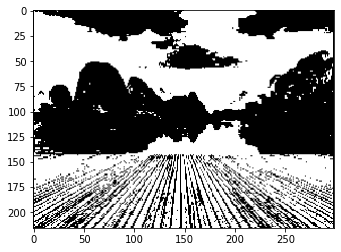

In [0]:
gray = gray_img.reshape((img_height*img_width))
thresh = gray.mean()
length = len(gray)

for i in range(length):
    if gray[i]>thresh:
        gray[i] = 1
    else:
        gray[i] = 0

gray_1 = gray.reshape((img_height, img_width))
plt.imshow(gray_1, cmap = 'gray')

Nice! The darker region (black) represents the background and the brighter (white) region is the foreground. We can define multiple thresholds as well to detect multiple objects:

In [0]:
pic_n = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
pic_n.shape

(64584, 3)

In [0]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 5 )
kmean.fit(pic_n)

print('kmean.cluster_centers_: ', kmean.cluster_centers_.shape)
print('Labels', kmean.labels_)
kmean_pixels = kmean.cluster_centers_[kmean.labels_]  

print(kmean_pixels.shape)   
kpic = kmean_pixels.reshape(img.shape[0],img.shape[1], img.shape[2]) 

kmean.cluster_centers_:  (5, 3)
Labels [1 3 3 ... 0 0 1]
(64584, 3)


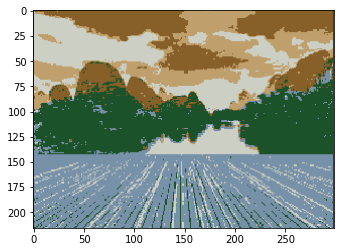

In [0]:
kpic = kpic.astype('uint8')
plt.imshow(kpic)

Mask R-CNN

Facebook AI Research (FAIR) pioneered a deep learning architecture, called Mask R-CNN, that can create a pixel-wise mask for each object in an image.

It's an Extension of the Popular Faster R-CNN that create pixel0wise mask for each object in the image

Faster - RCNN:

    Its class
    The bounding box coordinates

Mask RCNN:

    It adds a third branch to this which outputs the object mask as well.

STEPS:

1. We take an image as input and pass it to the ConvNet, which returns the feature map for that image

2. Region proposal network (RPN) is applied on these feature maps. This returns the object proposals(candidate bounding boxes) along with their objectness score

3. A RoI pooling layer is applied on these proposals(candidates) to bring down all the proposals to the same size

4. Finally, the proposals are passed to a fully connected layer to classify and output the bounding boxes for objects. It also returns the mask for each proposal


Backbone Model:

    ConvNet 

    To Extract Features maps from the Image

    In Mask R-CNN CnovNet used is ResNet 101


RPN:

    Use the Feature maps and apply regional proposal network

    As Output we get those region which contains some object

ROI:

    Region Obtained might be of different shapes, then we apply Pooling to make all regions of same shape

    Next passing it to a MLP to obtain class Label and Bounding Boxes Predicted


Till Above its Faster RCNN:

Now, What adds in Mask_RCNN is Segmentation Mask

    IOU with ground Box obtained from faster RCNN

    Once We ahve ROI based on IOU values, we can add a mask aka segmentation mask for each region that contained image.






Complete Details of Performing Mask RCNN

In [0]:
!git clone https://github.com/matterport/Mask_RCNN.git 

fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


Important Tensoeflow and Keras Version

In [0]:
!pip install tensorflow==1.3.0

In [0]:
!pip install keras==2.0.8

In [0]:
lib = '''numpy
scipy
Pillow
cython
matplotlib
scikit-image
tensorflow==1.3.0  
keras==2.0.8
opencv-python
h5py
imgaug
IPython'''

lib  = lib.split('\n') 

In [0]:
import os

Changing my dir and also i have an image saved there names MASKEX.png on which the Mask_RCNN applied

In [0]:
os.chdir('./Mask_RCNN')

In [0]:
os.getcwd()

'/content/Mask_RCNN'

In [0]:
#!setup.py install

In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
from samples.coco import coco
%matplotlib inline

Using TensorFlow backend.


In [0]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH) 

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "MASKEX")

In [0]:
#!wget https://github.com/matterport/Mask_RCNN/blob/master/mrcnn/config.py

In [0]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig() 
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [0]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True) 

In [0]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush'] 


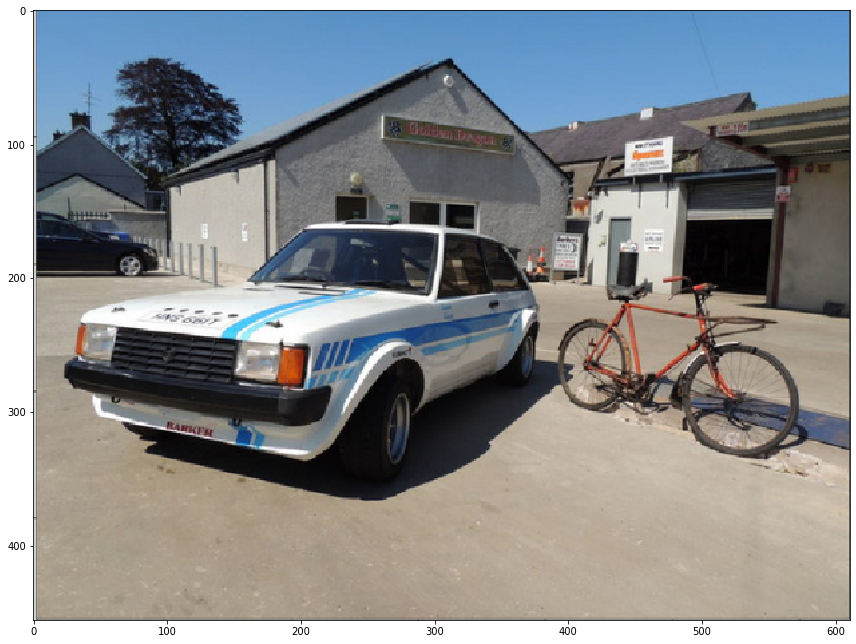

In [0]:

import skimage

# Load a random image from the images folder
image = skimage.io.imread('MASKEX.png')

# original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image) 

In [0]:
#!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

Processing 1 images
image                    shape: (456, 611, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


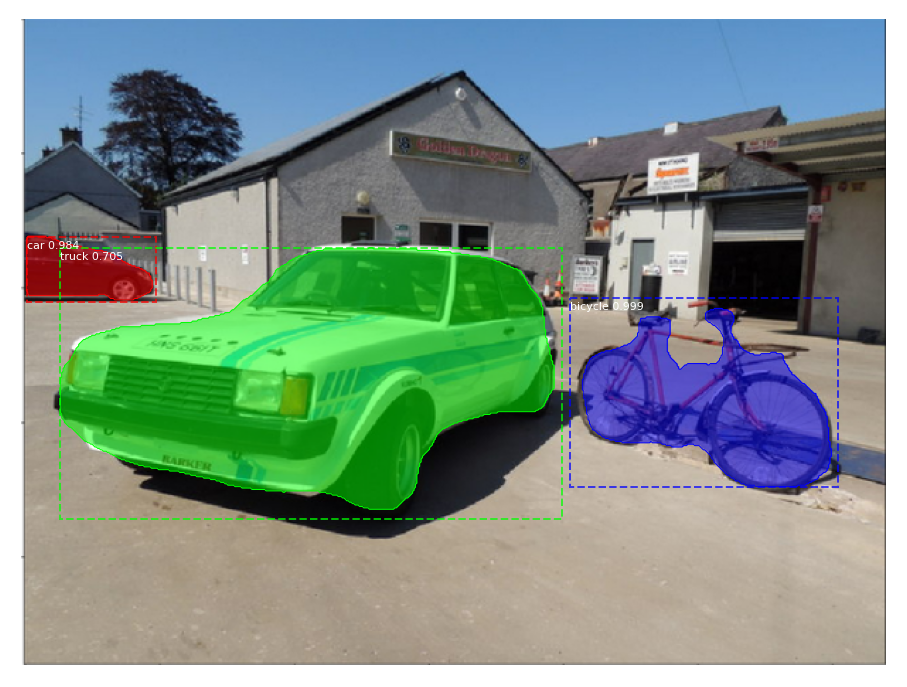

In [0]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results 
r = results[0] 
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:

mask = r['masks']
mask = mask.astype(int)
mask.shape

(456, 611, 3)

Three here above in the output is the number of object that is segmented from the given image.

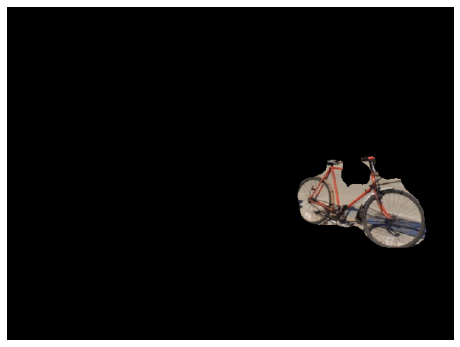

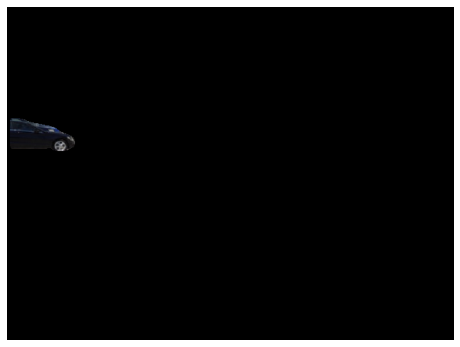

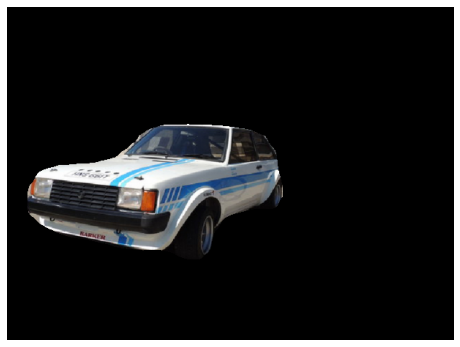

In [0]:
for i in range(mask.shape[2]):
    temp = skimage.io.imread('MASKEX.png')
    for j in range(temp.shape[2]):
        temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
    plt.figure(figsize=(8,8))
    plt.imshow(temp) 
    plt.axis(False) 